### Cust_Spend_Data.csv 파일을 통해서 고객의 의류소비, 음료소비, 음식소비 대이터를 통해서 비슷한 고객으로 그루핑 하자

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/Cust_Spend_Data.csv')

In [4]:
df

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3
5,6,F,4000,3,0,1,8
6,7,G,2500,5,0,11,2
7,8,H,2500,3,0,1,1
8,9,I,2000,2,0,2,2
9,10,J,1000,4,0,1,7


In [5]:
df.isna().sum()

Cust_ID            0
Name               0
Avg_Mthly_Spend    0
No_Of_Visits       0
Apparel_Items      0
FnV_Items          0
Staples_Items      0
dtype: int64

In [6]:
df

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3
5,6,F,4000,3,0,1,8
6,7,G,2500,5,0,11,2
7,8,H,2500,3,0,1,1
8,9,I,2000,2,0,2,2
9,10,J,1000,4,0,1,7


In [8]:
X = df.loc[ : , 'Avg_Mthly_Spend' : ]

In [9]:
X

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,10000,2,1,1,0
1,7000,3,0,10,9
2,7000,7,1,3,4
3,6500,5,1,1,4
4,6000,6,0,12,3
5,4000,3,0,1,8
6,2500,5,0,11,2
7,2500,3,0,1,1
8,2000,2,0,2,2
9,1000,4,0,1,7


In [10]:
import scipy.cluster.hierarchy as sch

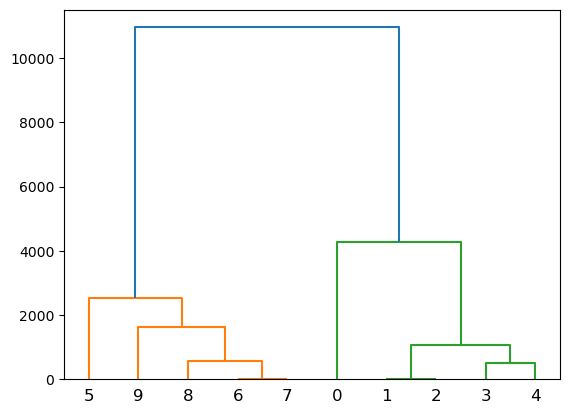

In [12]:
sch.dendrogram( sch.linkage(X, method='ward') ) 
plt.show()

In [13]:
from sklearn.cluster import AgglomerativeClustering

In [14]:
hc = AgglomerativeClustering(n_clusters= 3)

In [16]:
y_pred = hc.fit_predict(X)

In [18]:
df['Group'] = y_pred

In [19]:
df

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,Group
0,1,A,10000,2,1,1,0,2
1,2,B,7000,3,0,10,9,1
2,3,C,7000,7,1,3,4,1
3,4,D,6500,5,1,1,4,1
4,5,E,6000,6,0,12,3,1
5,6,F,4000,3,0,1,8,0
6,7,G,2500,5,0,11,2,0
7,8,H,2500,3,0,1,1,0
8,9,I,2000,2,0,2,2,0
9,10,J,1000,4,0,1,7,0


In [20]:
from sklearn.cluster import KMeans

In [21]:
wcss = []
for k in range(1, 11) :
    kmeans = KMeans(n_clusters= k, random_state= 5)
    kmeans.fit(X)
    wcss.append( kmeans.inertia_ )

In [22]:
wcss

[74525310.2,
 14500293.6,
 5387740.75,
 2187714.5,
 854349.4166666667,
 333469.3333333333,
 166789.16666666666,
 98.0,
 45.5,
 0.0]

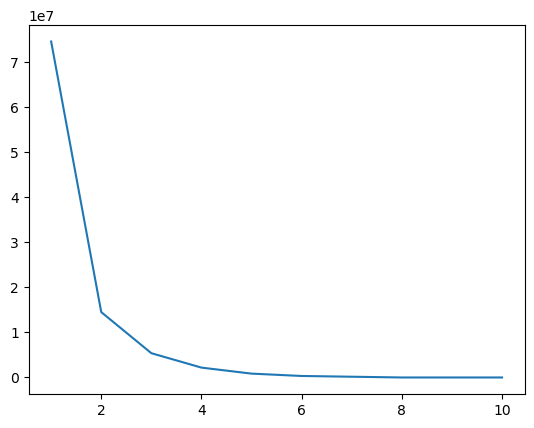

In [23]:
plt.plot( range(1, 11)  ,  wcss  )
plt.show()

In [24]:
kmeans = KMeans(n_clusters= 3, random_state=5)

In [26]:
y_pred = kmeans.fit_predict(X)

In [27]:
y_pred

array([2, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int32)

In [29]:
df['Group_K'] = y_pred

In [30]:
df

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,Group,Group_K
0,1,A,10000,2,1,1,0,2,2
1,2,B,7000,3,0,10,9,1,0
2,3,C,7000,7,1,3,4,1,0
3,4,D,6500,5,1,1,4,1,0
4,5,E,6000,6,0,12,3,1,0
5,6,F,4000,3,0,1,8,0,1
6,7,G,2500,5,0,11,2,0,1
7,8,H,2500,3,0,1,1,0,1
8,9,I,2000,2,0,2,2,0,1
9,10,J,1000,4,0,1,7,0,1
